# Comparing Ketamine and Midazolam after treatment in ROIs
- Analysis in HPC
- focus on end of treatment
- Amygdala
- vmPFC
- Hippocampus

#### Small explanation for the code for future reference (as it is a bit messy)
- I take all functional files of trauma vs relaxed first script first 1min
- I mask for amygdala - run analysis per session (1,2,3) and calculate effect (using pyMC3)
- I mask for vmPFC and do the same
- I mask for hippocampus and do the same
- Effect reported are amygdala and hippocampus show sig. difference in the post treatment scan. Amygdala shows effect in 30 days f/u hipocampus doesn't. vmPFC and OFC doesn't show anything.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import relevant packages
import glob
import numpy as np
import scipy
import nilearn
import nilearn.image
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import pymc3 as pm
#import arviz as az
#from pymc3.glm import GLM

In [6]:
# in case we want frequency stats
#import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
# Set session
ses = 2
## Grab group
# compare between groups

medication_cond = pd.read_csv('/home/oad4/ketamine_reconsolidation/kpe_sub_condition.csv')

func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/kpe/results/ScriptPart_ses%s/modelfit/_subject_id_*/modelestimate/results/zstat7.nii.gz' %(ses))

func_files.sort()
len(func_files)

26

In [12]:
# remove 1315
del func_files[6] #(only session 1,2)

In [1]:
## Amygdala as mask
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)


masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                smoothing_fwhm=None, standardize=False,
                                        detrend=False, verbose=9).fit()

NameError: name 'nilearn' is not defined

In [14]:
t_arr = []
mean_act = []
scr_id = []
#delayed_get_data = dask.delayed(masker.fit_transform)
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.transform(func)
    t_arr.append(np.mean(t_map, axis=1)[0])
    


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. 

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data 

In [3]:
5.2+e06

NameError: name 'e06' is not defined

In [15]:
t_arr

[-0.004718076,
 0.37819397,
 -0.1528819,
 0.15622556,
 -0.1794614,
 -0.70246124,
 0.13374044,
 -0.16786672,
 -0.5936529,
 -0.29202712,
 0.17872314,
 0.8593175,
 0.26580465,
 -0.34873343,
 0.13198203,
 0.025431762,
 -0.2545567,
 -0.564391,
 0.35210565,
 0.032627586,
 -0.21461801,
 0.20683345,
 0.022625467,
 0.4336127,
 0.4776477]

In [15]:
df_ses3 = []
df_ses3 = pd.DataFrame({'scr_id': scr_id, 'amg3': t_arr})
df_ses3 = pd.merge(medication_cond, df_ses3)
df_ses3 = df_ses3.rename(columns={'med_cond': 'group'})
#df['group'] = medication_cond['med_cond']
df_ses3 = df_ses3.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [ ]:
df_ses3.groupby('group').describe(percentiles=[.025, 0.975])
#df_ses3.groupby('group').median()

In [12]:
df_ses2 = []
df_ses2 = pd.DataFrame({'scr_id': scr_id, 'amg2': t_arr})
df_ses2 = pd.merge(medication_cond, df_ses2)
df_ses2 = df_ses2.rename(columns={'med_cond': 'group'})
#df['goup'] = medication_cond['med_cond']
df_ses2 = df_ses2.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [ ]:
df_ses2.groupby('group').describe(percentiles=[.025, 0.975])
#df_ses2.groupby('group').median()

In [ ]:
sns.set_style("ticks")
sns.boxplot('group','amg2',data=df_ses2)
sns.stripplot('group','amg2',data=df_ses2)
scipy.stats.ttest_ind(df_ses2.amg2[df_ses2.group=='ketamine'],
                      df_ses2.amg2[df_ses2.group=='midazolam']
                     )

In [8]:
df_ses1 = []
df_ses1 = pd.DataFrame({'scr_id': scr_id, 'amg1': t_arr})
df_ses1 = pd.merge(medication_cond, df_ses1)
df_ses1 = df_ses1.rename(columns={'med_cond': 'group'})
df_ses1 = df_ses1.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})
#df['group'] = medication_cond['med_cond']

In [29]:
df_ses1.groupby('group').describe(percentiles=[.025, 0.975])

amg1                                                              \
          count      mean       std       min      2.5%       50%     97.5%   
group                                                                         
ketamine   12.0  0.040312  0.215747 -0.327680 -0.300238  0.048265  0.354188   
midazolam  10.0 -0.007294  0.248357 -0.314799 -0.298024 -0.033848  0.432160   

                     
                max  
group                
ketamine   0.373153  
midazolam  0.487111

In [ ]:
df_ses1

In [ ]:
df_ses1 = pd.merge(df, df_ses1)
df_ses1['amg_change'] = df_ses1.meanAct - df_ses1.amg1

In [ ]:
# this is in case we need to show the lowering of amygdala reactivation before and after treatment
sns.boxplot(y='amg1', x= 'group', data = df_ses1)
sns.stripplot(y='amg1', x= 'group', data = df_ses1)

In [ ]:
df_ses3 = pd.merge(df, df_ses3)
df_ses3

In [ ]:
sns.barplot(x='group',y='amg3', data=df_ses3, ci=95)
#sns.boxplot(x='group',y='meanAct', data=df)
scipy.stats.ttest_ind(df_ses3.amg3[df_ses3['group']=='ketamine'], 
                      df_ses3['amg3'][df_ses3['group']=='midazolam'])

In [ ]:
df_ses1 = []
df_ses1 = pd.DataFrame({'scr_id': scr_id, 'meanAct_ses1': average[0]})
df_ses1 = pd.merge(medication_cond, df_ses1)
df_ses1 = df_ses1.rename(columns={'med_cond': 'group'})
#df['group'] = medication_cond['med_cond']
df_ses1 = df_ses1.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [ ]:
group = {'ketamine': 1,'midazolam': 0} 
df_ses3['groupIdx'] =[group[item] for item in df_ses3.group] 

In [ ]:
df = []
df = pd.DataFrame({'scr_id': scr_id, 'meanAct': t_arr})
df = pd.merge(medication_cond, df)
df = df.rename(columns={'med_cond': 'group'})
#df['group'] = medication_cond['med_cond']
df = df.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

## Combine all three sessions

In [16]:
df = pd.merge(df_ses1, df_ses2, how='left')
df = pd.merge(df, df_ses3, how='left') # adding that to avoid removing Nan subjects
#df = pd.merge(df, df_ses4, how='left')
# add index for group (0 and 1)
group = {'ketamine': 1,'midazolam': 0} 
df['groupIdx'] =[group[item] for item in df.group] 
# save the dataframe
df.to_csv('amg_TraumavsNeutral.csv', index = False)

In [17]:
df.groupby(['group']).describe()

amg1                                                              \
          count      mean       std       min       25%       50%       75%   
group                                                                         
ketamine   13.0  0.011338  0.405330 -0.760030 -0.138400  0.072214  0.316908   
midazolam  13.0  0.091727  0.382141 -0.344641 -0.142767 -0.013621  0.221137   

                     amg2            ...      amg3           groupIdx       \
                max count      mean  ...       75%       max    count mean   
group                                ...                                     
ketamine   0.533188  13.0 -0.158637  ...  0.153811  0.391631     13.0  1.0   
midazolam  0.990820  12.0  0.186816  ...  0.288222  0.906373     13.0  0.0   

                                         
           std  min  25%  50%  75%  max  
group                                    
ketamine   0.0  1.0  1.0  1.0  1.0  1.0  
midazolam  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 32 columns]

In [18]:
df.describe()

,amg1,amg2,amg3,groupIdx
count,26.000000,25.000000,22.000000,26.000000
mean,0.051533,0.007180,-0.012898,0.500000
std,0.388118,0.364781,0.392015,0.509902
min,-0.760030,-0.702461,-0.721853,0.000000
25%,-0.141831,-0.214618,-0.237750,0.000000
50%,0.003848,0.025432,-0.111208,0.500000
75%,0.309385,0.206833,0.227704,1.000000
max,0.990820,0.859317,0.906373,1.000000


Ttest_indResult(statistic=nan, pvalue=nan)

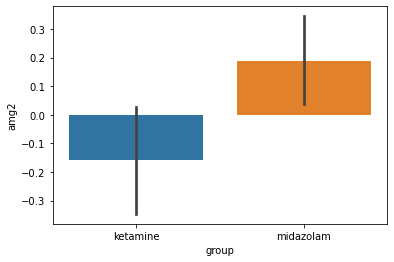

In [19]:
# plot
sns.barplot(x='group',y='amg2', data=df, ci=95)
#sns.boxplot(x='group',y='meanAct', data=df)
scipy.stats.ttest_ind(df.amg2[df['group']==1], df['amg2'][df['group']==0])

In [ ]:
# test changes betwen sessions
df2ses = pd.merge(df, df_ses1)
df2ses['amg2_1'] = df2ses.meanAct - df2ses.meanAct_ses1


In [ ]:
sns.barplot(x='group',y='amg2_1', data=df2ses, ci=68)
#sns.boxplot(x='group',y='meanAct', data=df)
scipy.stats.ttest_ind(df2ses.amg2_1[df2ses['group']=='ketamine'], 
                      df2ses['amg2_1'][df2ses['group']=='midazolam'])

## Use PyMC3 for bayesian based analysis 

In [91]:
# first code new variable for group index (1=ketamine, 0= midazolam)
group = {'ketamine': 1,'midazolam': 0} 
df['groupIdx'] =[group[item] for item in df.group] 

In [ ]:
# Full model
with pm.Model() as model_1:
    # Data
    group = pm.Data('group', df.groupIdx)
    amg = pm.Data('amg', df.amg2)
    #ketamine = pm.Data('ketamine', df.meanAct[df['group']=='ketamine'].values)
    #midazolam = pm.Data('midazolam', df.meanAct[df['group']=='midazolam'].values)
    
    # Priors
    alpha = pm.Normal('alpha', mu=5, sd=5)
    beta = pm.Normal('beta', mu=-5, sd=5)
    sigma = pm.HalfNormal('sigma', sigma=5)
    
    # Regression
    mu = alpha + beta * group
    diff_group = pm.Normal('diff_group', mu=mu, sd=sigma, observed=amg)
    
    # Prior sampling, trace definition and posterior sampling
    #prior = pm.sample_prior_predictive()
    posterior_1 = pm.sample(draws=4000, tune=4000) # this is the trace sampling
   # posterior_pred_1 = pm.sample_posterior_predictive(posterior_1)

In [ ]:
#az.summary(posterior_1, credible_interval=.95).round(2) # adding round to make shorted floats
pm.summary(posterior_1, hdi_prob=0.95)#, alpha=.05).round(2)# also possible

In [92]:
# play with glm module of pymc3
with pm.Model() as model_glm:
    GLM.from_formula('amg2 ~ groupIdx', df)
    trace = pm.sample(draws=5000, tune=3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, groupIdx, Intercept]


Sampling 4 chains for 3_000 tune and 5_000 draw iterations (12_000 + 20_000 draws total) took 9 seconds.


In [93]:
az.summary(trace, hdi_prob=.95).round(2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.19,0.10,-0.01,0.38,0.0,0.0,8420.0,8309.0,8422.0,10514.0,1.0
groupIdx,-0.34,0.14,-0.60,-0.08,0.0,0.0,8517.0,8517.0,8542.0,9916.0,1.0
sd,0.34,0.05,0.24,0.44,0.0,0.0,9017.0,8975.0,8959.0,8577.0,1.0


In [ ]:
pm.plot_posterior(trace['groupIdx'])

In [ ]:
trace.posterior.groupIdx

In [ ]:
sns.distplot(trace.posterior['groupIdx'])
#sum(trace['groupIdx']>0) / len(trace['groupIdx'])

In [ ]:
# set variables
sns.set_style("ticks") # set style
y = 'amg2'
dfPlot = df
ci = np.quantile(trace.posterior.groupIdx, [.025,.975])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(3, 5),gridspec_kw={'width_ratios': [1, .2],
                                                        'wspace':.1})
g1 = sns.stripplot(y= y, x='group', data=dfPlot, size = 8, ax=ax1)
sns.boxplot(y= y, x='group', data=dfPlot,  ax=ax1,
            boxprops=dict(alpha=.3))
g2 = sns.distplot(trace.posterior['groupIdx'], ax = ax2, vertical=True)
ax2.vlines(x=0.001,ymin=ci[0], ymax=ci[1], color='black', 
           linewidth = 2, linestyle = "-")

#g3.set_ylim(-.7, .7)
#ax1.set_ylim(-.7,.7)
ax2.set_ylim(g1.get_ylim()) # use first graph's limits to get the relevant for this one
ax2.yaxis.tick_right()
ax2.set_xticks([])
ax2.set_ylabel("Difference between groups", fontsize=14) 
ax2.yaxis.set_label_position("right")
ax1.set_ylabel("Amg reactivity to traumatic script", fontsize=12)
ax1.set_xlabel("Group", fontsize=14)
fig.savefig('amygdalaReactivity.png', dpi=600, bbox_inches='tight')

### Creating mixed level model

In [94]:
df_long = pd.melt(df, id_vars=['scr_id','groupIdx'], value_vars=['amg1','amg2','amg3'])
df_long.to_csv('amygdala.csv', index=False)

In [95]:
with pm.Model() as model_glm1:
    GLM.from_formula('value ~ groupIdx + variable', df_long)
    trace_mixed = pm.sample(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, groupIdx, variable[T.amg3], variable[T.amg2], Intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 6 seconds.


In [96]:
az.summary(trace_mixed)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.162,0.085,0.006,0.325,0.001,0.001,4418.0,4418.0,4423.0,5188.0,1.0
variable[T.amg2],-0.029,0.102,-0.227,0.156,0.001,0.001,5894.0,4302.0,5893.0,5469.0,1.0
variable[T.amg3],-0.043,0.108,-0.235,0.164,0.001,0.001,5980.0,4427.0,5987.0,5911.0,1.0
groupIdx,-0.240,0.087,-0.409,-0.086,0.001,0.001,5716.0,5621.0,5727.0,4856.0,1.0
sd,0.367,0.032,0.310,0.428,0.000,0.000,6195.0,6189.0,6089.0,3720.0,1.0


#### There is a main effect for the group (ketamine lower than midazolam)

## Next we do the same for vmPFC

In [ ]:
# now lets do the same with vmPFC
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/vmpfc_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=5", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=None,
                                        standardize=False, detrend=False, verbose=5)

In [ ]:
mean_act_vmpfc = []
scr_id = []
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.fit_transform(func)
    
    average = np.mean(np.array(t_map))
    mean_act_vmpfc.append(average)


In [ ]:
#df["vmpfc2"] = mean_act_vmpfc
df_vmpfc = pd.DataFrame({'scr_id': scr_id, 'vmpfc2': mean_act_vmpfc})
df = pd.merge(df, df_vmpfc, how='left')
#df_vmpfc = pd.merge(df_vmpfc, medication_cond)
sns.boxplot(x='group',y='vmpfc2', data=df)
#sns.barplot(x='med_cond',y='meanAct', data=df_vmpfc, ci=68)
scipy.stats.ttest_ind(df.vmpfc2[df['group']=='ketamine'],
                      df.vmpfc2[df['group']=='midazolam'])

In [ ]:
df_vmpfc

In [ ]:
with pm.Model() as model_glm:
    GLM.from_formula('vmPFC ~ groupIdx', df)
    trace_vmpfc = pm.sample(draws=4000, tune=3000)

In [ ]:
pm.summary(trace_vmpfc, credible_interval=.95).round(2)

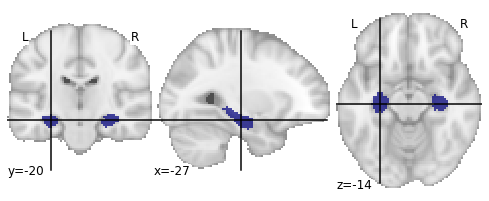

In [84]:
## Hippocampus
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=15", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=None,
                                        standardize=False, detrend=False, verbose=5)

In [85]:
mean_act_hippo = []
scr_id = []
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.fit_transform(func)
    
    average = np.mean(np.array(t_map))
    mean_act_hippo.append(average)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning 

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracti

In [86]:
df_ses3['hippo3'] = mean_act_hippo

In [ ]:
df_ses3.groupby('group').describe()

In [79]:
df_ses2['hippo2'] = mean_act_hippo

In [72]:
df_ses1['hippo1'] = mean_act_hippo

In [ ]:
sns.barplot(x='group',y='hippo3', data=df_ses3, ci=95)
scipy.stats.ttest_ind(df_ses3.hippo3[df_ses3['group']=='ketamine'],
                      df_ses3['hippo3'][df_ses3['group']=='midazolam'])

In [ ]:
df['hippo_21'] = df.hippo2 - df.hippo1
sns.barplot(x='group',y='hippo_21', data=df, ci=68)
scipy.stats.ttest_ind(df.hippo_21[df['group']=='ketamine'], df['hippo_21'][df['group']=='midazolam'])

In [ ]:
with pm.Model() as model_glm:
    GLM.from_formula('hippo2 ~ groupIdx', df)
    trace_hippo = pm.sample(draws=2000, tune=2000,random_seed=103)
az.summary(trace_hippo, hdi_prob=.95).round(2)

In [ ]:
trace_hippo.groupIdx

In [ ]:
# set variables
sns.set_style("ticks")
y = 'hippo2'
dfPlot = df
ci = np.quantile(trace_hippo.groupIdx, [.025,.975])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(3, 5),gridspec_kw={'width_ratios': [1, .2],
                                                        'wspace':.1})
g1 = sns.stripplot(y= y, x='group', data=dfPlot, size = 8, ax=ax1)
sns.boxplot(y= y, x='group', data=dfPlot,  ax=ax1,
            boxprops=dict(alpha=.3))
g2 = sns.distplot(trace_hippo['groupIdx'], ax = ax2, vertical=True)
ax2.vlines(x=0.001,ymin=ci[0], ymax=ci[1], color='black', 
           linewidth = 2, linestyle = "-")


ax2.set_ylim(g1.get_ylim()) # use first graph's limits to get the relevant for this one
ax2.yaxis.tick_right()
ax2.set_xticks([])
ax2.set_ylabel("Difference between groups", fontsize=14) 
ax2.yaxis.set_label_position("right")
ax1.set_ylabel("Hippocampus reactivity to traumatic script", fontsize=12)
ax1.set_xlabel("Group", fontsize=14)
fig.savefig('hippoReactivity.png', dpi=600, bbox_inches='tight')

In [ ]:
df.groupby('group').describe()

In [ ]:
with pm.Model() as model_glm:
    GLM.from_formula('hippo3 ~ groupIdx', df)
    trace_hippo = pm.sample(draws=2000, tune=2000,random_seed=103)
az.summary(trace_hippo, hdi_prob=.95).round(2)

## Running mixed level models

In [97]:
df_longAmg = pd.melt(df, id_vars=['scr_id','groupIdx'], value_vars=['amg1','amg2','amg3'])
df_longAmg

,scr_id,groupIdx,variable,value
0,KPE008,1,amg1,0.384864
1,KPE1223,1,amg1,0.072214
2,KPE1253,0,amg1,-0.142767
3,KPE1263,0,amg1,-0.254799
4,KPE1293,1,amg1,-0.054429
...,...,...,...,...
76,KPE1561,0,amg3,0.184200
77,KPE1573,1,amg3,0.391631
78,KPE1578,0,amg3,-0.246893
79,KPE1587,1,amg3,NaN


In [98]:
df_longAmg['scr_id'] = df_longAmg.scr_id.astype('category')
sub_idx = df_longAmg.scr_id.cat.codes.values # get county category index values (613 x 1) vec with nums [0-7]
print(sub_idx)
# set y observerd

#print(data.pcl)
n_subs = len(np.unique(df_longAmg.scr_id))
print(n_subs)
# set time as index also
# set only three categories (after, 1month, 3months)
df_longAmg.variable = pd.Categorical(df_longAmg.variable, 
                    categories=['amg1','amg2','amg3'])
timeIDX = df_longAmg.variable.cat.codes.values
print(timeIDX)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24 25 26]
27
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


In [126]:
df_longAmg.describe()

,groupIdx,value
count,81.000000,75.000000
mean,0.518519,0.011446
std,0.502770,0.373865
min,0.000000,-0.760030
25%,0.000000,-0.223615
50%,1.000000,-0.004718
75%,1.000000,0.251992
max,1.000000,0.990820


<AxesSubplot:xlabel='amg3', ylabel='Count'>

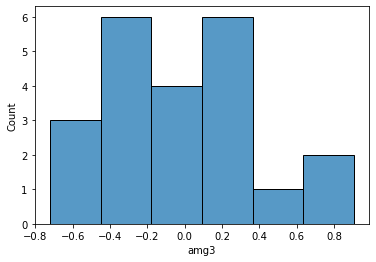

In [39]:
sns.histplot(df['amg3'])

In [129]:
with pm.Model() as multilevel_real:
    # Hyperpriors for group nodes
    #mu_a = pm.Normal('mu_a', mu=0.1, sigma=0.1)
    mu_b = pm.Normal('mu_b', mu=0, sd=0.1)
 
    
    a = pm.Normal('a', mu=0.2, sd=0.1, shape=n_subs)
       
    b = pm.Normal('b', mu=mu_b, sd=0.1, shape=3)
    #inter = pm.Normal('inter', mu=0, sd=1) # modeling interaction for each treatment
    
    bMed = pm.Normal('bMed', mu=0, sd=1.5)#, shape=2)
    #bMed = pm.Binomial('bMed', n=n_subs, p=0.5)#, mu=0, sd=0.3)
  
    # Model error
    eps = pm.HalfCauchy('eps', 3)

    y_hat = a[sub_idx] + b[timeIDX]*timeIDX + bMed*df_longAmg.groupIdx# + inter*timeIDX*df_longAmg.groupIdx

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_longAmg.value)
    real_trace = pm.sample(4000, tune=2000, target_accept=.9, return_inferencedata=True, random_seed=112)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [likelihood_missing, eps, bMed, b, a, mu_b]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 14 seconds.


In [130]:
az.summary(real_trace,  hdi_prob=.94)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_b,-0.025,0.065,-0.141,0.102,0.001,0.000,11841.0,10542.0,11825.0,12611.0,1.0
a[0],0.236,0.090,0.069,0.406,0.001,0.000,17078.0,16451.0,17115.0,11454.0,1.0
a[1],0.219,0.089,0.047,0.381,0.001,0.001,18134.0,15594.0,18145.0,12217.0,1.0
a[2],0.152,0.093,-0.025,0.325,0.001,0.001,16622.0,14004.0,16626.0,13021.0,1.0
a[3],0.204,0.088,0.040,0.371,0.001,0.000,17707.0,15942.0,17716.0,12565.0,1.0
a[4],0.195,0.089,0.031,0.365,0.001,0.000,19925.0,17026.0,19943.0,12789.0,1.0
a[5],0.106,0.091,-0.071,0.271,0.001,0.001,18082.0,14187.0,18041.0,12989.0,1.0
a[6],0.185,0.093,0.008,0.358,0.001,0.001,18004.0,15668.0,18017.0,11804.0,1.0
a[7],0.217,0.089,0.050,0.386,0.001,0.000,19509.0,17792.0,19468.0,12318.0,1.0
a[8],0.186,0.090,0.020,0.361,0.001,0.000,21210.0,17519.0,21186.0,12169.0,1.0


In [102]:
md2 = smf.mixedlm("value ~ variable + groupIdx", df_longAmg, groups=df_longAmg["scr_id"], 
                  missing='drop', re_formula='~variable')
mdf2 = md2.fit()
print(mdf2.summary())

                      Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          value   
No. Observations:           75               Method:                      REML    
No. Groups:                 27               Scale:                       0.0709  
Min. group size:            2                Log-Likelihood:              -32.0077
Max. group size:            3                Converged:                   Yes     
Mean group size:            2.8                                                   
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                                0.172    0.092  1.858 0.063 -0.009  0.353
variable[T.amg2]                        -0.031    0.082 -0.380 0.704 -0.191  0.129
variable[T.amg3]           

In [44]:
aov = pg.mixed_anova(data=df_longAmg, dv='value', between='groupIdx', within='variable',
                     subject='scr_id', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
groupIdx     1.215      1     19  1.215  6.114    0.023  0.243  nan
variable     0.016      2     38  0.008  0.079    0.924  0.004    0.939
Interaction  0.381      2     38  0.191  1.888    0.165  0.090  nan



### Same test for hippocampus

In [ ]:
df_longHippo = pd.melt(df, id_vars=['scr_id','groupIdx'], value_vars=['hippo1','hippo2','hippo3'])


In [ ]:
with pm.Model() as multilevel_realHippo:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=30, sigma=10)
    mu_b = pm.Normal('mu_b', mu=0, sigma=10)
    
  #  med_mu = pm.Normal('mu_med', mu=0, sigma=15)
    
    a = pm.Normal('a', mu=mu_a, sd=10, shape=n_subs)
       
    b = pm.Normal('b', mu=0, sigma=10, shape=3)
    #inter = pm.Normal('inter', mu=0, sd=10) # modeling interaction for each treatment
    
    bMed = pm.Normal('bMed', mu=0, sd=10)
  
    # Model error
    eps = pm.HalfCauchy('eps', 10)

    y_hat = a[sub_idx] + b*df_longHippo.variable + bMed*df_longHippo.groupIdx# + inter*timeIDX*df_longAmg.groupIdx

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_longHippo.value)
    trace_hippo = pm.sample(4000, tune=2000, target_accept=.9, return_inferencedata=True)

In [ ]:
az.summary(trace_hippo,  hdi_prob=.95)

In [ ]:
aov_hippo = pg.mixed_anova(data=df_longHippo, dv='value', between='groupIdx', within='variable',
                     subject='scr_id', correction=False, effsize="np2")
pg.print_table(aov_hippo)